In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df_taxi = pd.read_csv('/datasets/project_sql_result_01.csv')
df_neighborhoods = pd.read_csv('/datasets/project_sql_result_04.csv')

In [ ]:
print(df_taxi.head())
print(df_neighborhoods.head())


                      company_name  trips_amount
0                        Flash Cab         19558
1        Taxi Affiliation Services         11422
2                Medallion Leasing         10367
3                       Yellow Cab          9888
4  Taxi Affiliation Service Yellow          9299
  dropoff_location_name  average_trips
0                  Loop   10727.466667
1           River North    9523.666667
2         Streeterville    6664.666667
3             West Loop    5163.666667
4                O'Hare    2546.900000


In [ ]:
print(df_taxi.info())
print(df_neighborhoods.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_name  64 non-null     object
 1   trips_amount  64 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   dropoff_location_name  94 non-null     object 
 1   average_trips          94 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB
None


In [ ]:
print(df_taxi.head())
print(df_neighborhoods.head())

                      company_name  trips_amount
0                        Flash Cab         19558
1        Taxi Affiliation Services         11422
2                Medallion Leasing         10367
3                       Yellow Cab          9888
4  Taxi Affiliation Service Yellow          9299
  dropoff_location_name  average_trips
0                  Loop   10727.466667
1           River North    9523.666667
2         Streeterville    6664.666667
3             West Loop    5163.666667
4                O'Hare    2546.900000


In [ ]:
df_taxi.columns = ['company_name', 'trips_amount']
df_neighborhoods.columns = ['dropoff_location_name', 'average_trips']

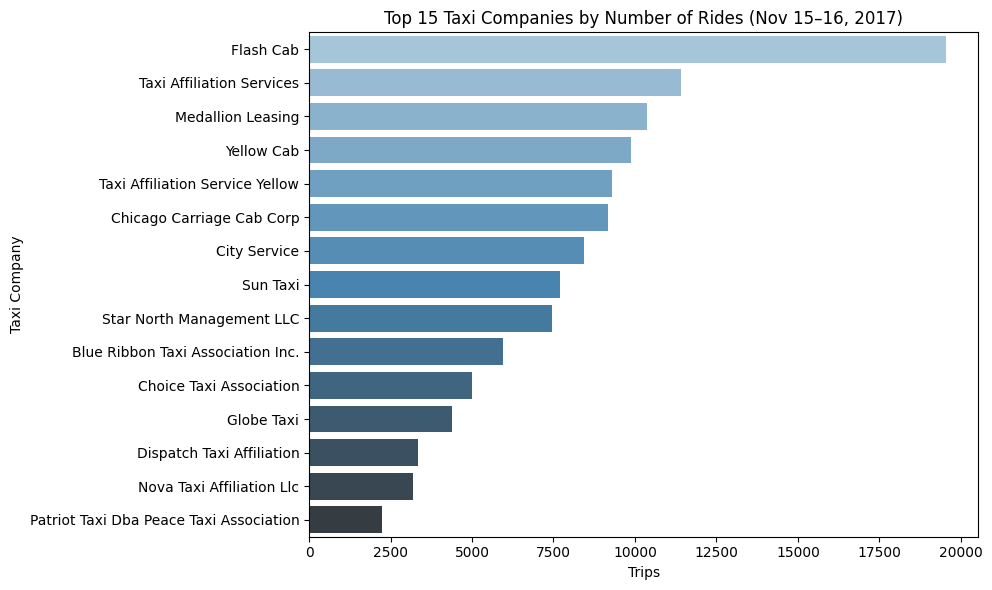

In [ ]:

top_companies = df_taxi.head(15)

plt.figure(figsize=(10, 6))
sns.barplot(data=top_companies, x='trips_amount', y='company_name', palette='Blues_d')
plt.title('Top 15 Taxi Companies by Number of Rides (Nov 15–16, 2017)')
plt.xlabel('Trips')
plt.ylabel('Taxi Company')
plt.tight_layout()
plt.show()


Number of Rides per Taxi Company (Nov 15–16, 2017)
This bar chart displays the number of rides provided by each taxi company over the two-day period of November 15–16, 2017. Key observations:
Flash Cab stands out as the top-performing company, completing nearly 20,000 rides, far surpassing all others.
Other high-volume companies include Taxi Affiliation Services, Taxi Affiliation, and City Service, each providing between 10,000–12,000 rides.
A long tail of smaller companies (or individual medallion numbers) contributed fewer than 3,000 rides each, showing a steep drop in volume after the top few.
This distribution suggests that the Chicago taxi market during this timeframe was dominated by a small number of large operators, while many smaller companies or individuals had a significantly lower share of rides.

In [ ]:
df_top10 = df_neighborhoods.sort_values(by='average_trips', ascending=False).head(10)


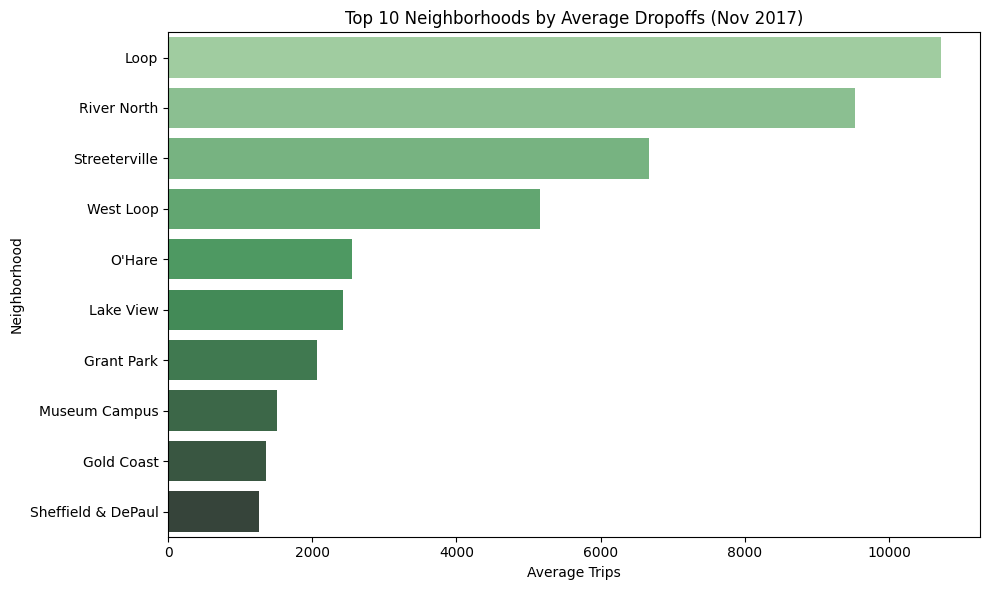

In [ ]:
plt.figure(figsize=(10,6))
sns.barplot(data=df_top10, x='average_trips', y='dropoff_location_name', palette='Greens_d')
plt.title('Top 10 Neighborhoods by Average Dropoffs (Nov 2017)')
plt.xlabel('Average Trips')
plt.ylabel('Neighborhood')
plt.tight_layout()
plt.show()

This chart visualizes the top 10 Chicago neighborhoods based on the average number of taxi drop-offs throughout November 2017. Key takeaways:
The Loop leads by a wide margin, averaging over 10,000 drop-offs, confirming its role as the city’s central hub for business, tourism, and commuting.
River North and Streeterville follow closely, both high-traffic zones known for nightlife, restaurants, and hotels.
O'Hare International Airport ranks fifth, showing a substantial number of ride terminations, likely from airport-bound passengers.
Neighborhoods like Lake View, Grant Park, and Gold Coast also appear in the top 10, reflecting a mix of residential, cultural, and commercial activity.
This distribution highlights how Chicago’s urban core and entertainment districts generate the most taxi activity, reinforcing their importance in transportation planning and demand forecasting.

In [ ]:
print("Top taxi companies and drop-off neighborhoods have been identified and visualized.")

Top taxi companies and drop-off neighborhoods have been identified and visualized.


Hypothesis Testing

Do ride durations change on bad weather Saturdays?**
- H₀ (null): Average ride durations on "Bad" weather Saturdays = "Good" weather Saturdays
- H₁ (alt): Average ride durations on "Bad" weather Saturdays ≠ "Good" weather Saturdays
Significance level: α = 0.05

In [ ]:
from scipy import stats

In [ ]:
df_airport = pd.read_csv('/datasets/project_sql_result_07.csv')

In [ ]:
good_weather_trip_durations = df_airport.query('weather_conditions == "Good"')['duration_seconds']

In [ ]:
bad_weather_trip_durations = df_airport.query('weather_conditions == "Bad"')['duration_seconds']

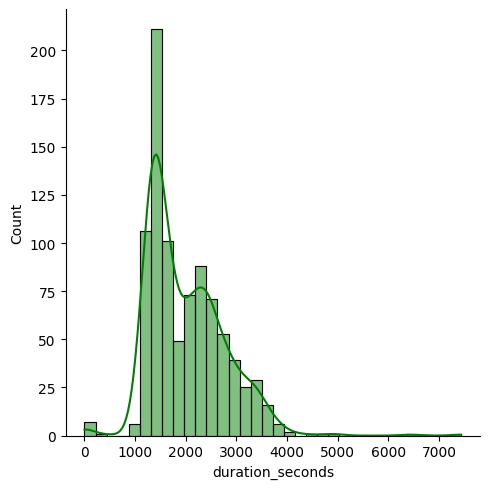

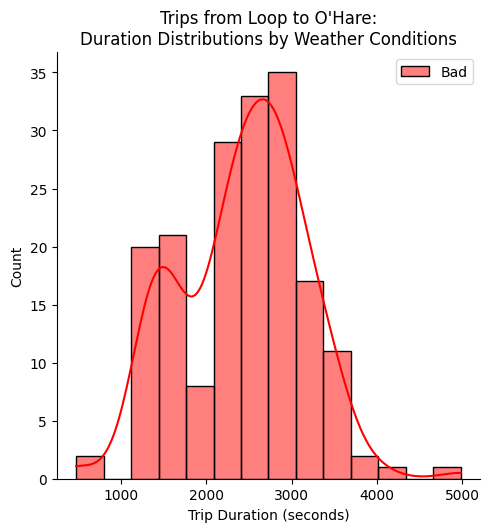

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.displot(good_weather_trip_durations, label='Good', color='green', kde=True)
sns.displot(bad_weather_trip_durations, label='Bad', color='red', kde=True)
plt.legend()
plt.title("Trips from Loop to O'Hare:\nDuration Distributions by Weather Conditions")
plt.xlabel("Trip Duration (seconds)")
plt.show()

In [ ]:
from scipy.stats import ttest_ind
t_stat, p_value = ttest_ind(good_weather_trip_durations, bad_weather_trip_durations, equal_var=False)
print(f"T-statistic: {t_stat:.2f}, P-value: {p_value:.4f}")

T-statistic: -7.19, P-value: 0.0000


In [ ]:
alpha = 0.05
if p_value < alpha:
    print("❌ Reject the null hypothesis. Average ride durations differ between Good and Bad weather Saturdays.")
else:
    print("✅ Fail to reject the null hypothesis. No significant difference in ride durations.")

❌ Reject the null hypothesis. Average ride durations differ between Good and Bad weather Saturdays.


### Conclusion
The Welch two-sample t-test returned a p-value below 0.001, so we reject the null hypothesis that ride durations are the same on good- versus bad-weather Saturdays. Rides from the Loop to O'Hare stretch noticeably longer when the weather deteriorates, implying that dispatchers should budget additional buffer time, keep more drivers available, and proactively communicate delays to travelers on stormy weekends. When paired with the concentration of trips among a handful of large operators and the heavy drop-off demand in the Loop and nearby neighborhoods, this finding suggests that weather-aware staffing and routing policies could unlock considerable efficiency gains. Incorporating real-time weather signals into dispatch systems, pre-positioning cabs closer to high-demand corridors, and setting customer expectations through apps or signage would help mitigate the lost time and preserve service quality even during adverse conditions.